In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

file_path = "HR_comma_sep.csv"
df = pd.read_csv(file_path)

print(df.head())

print(df.isnull().sum())

print(df.describe())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

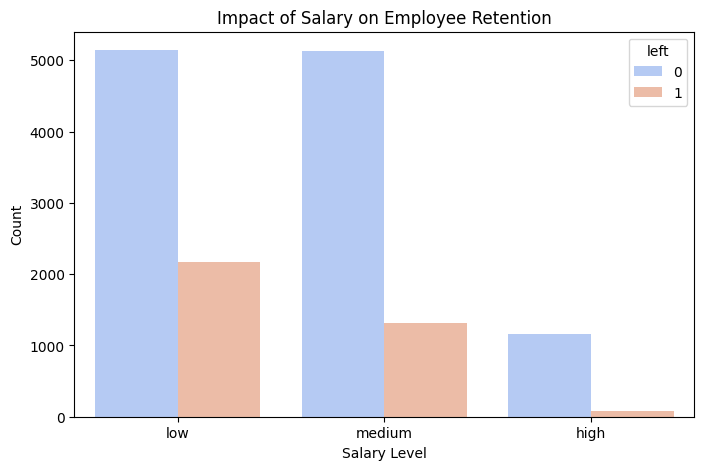

In [15]:
# Salary vs Employee Retention
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="salary", hue="left", palette="coolwarm")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.show()


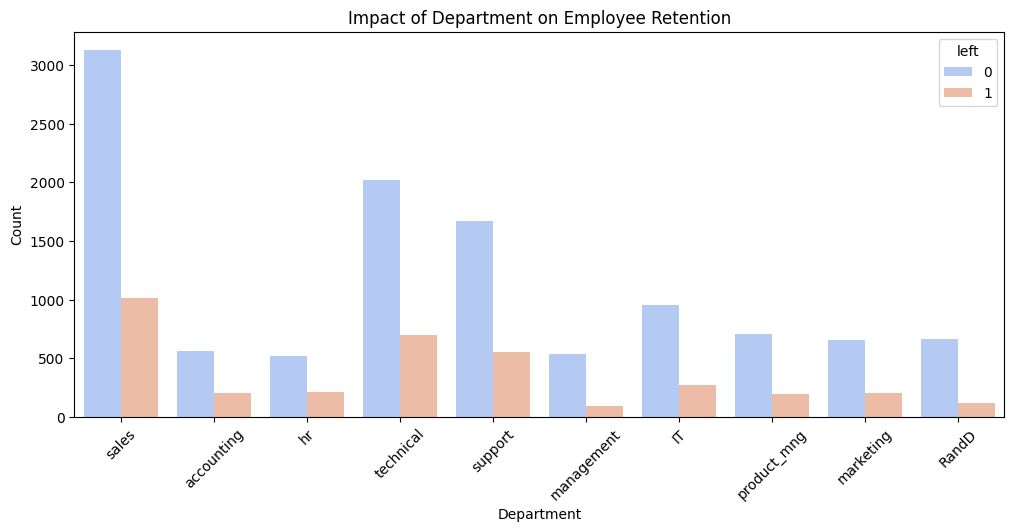

In [16]:
# Department vs Employee Retention
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="Department", hue="left", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()


In [8]:
# Data Preprocessing for Logistic Regression
label_enc = LabelEncoder()
df["salary"] = label_enc.fit_transform(df["salary"])
df["Department"] = label_enc.fit_transform(df["Department"])

# Selecting important features based on EDA
features = ["satisfaction_level", "salary", "time_spend_company", "promotion_last_5years"]
X = df[features]
y = df["left"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Model Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression Model:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of Logistic Regression Model: 0.747
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.85      2294
           1       0.43      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.61      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000



In [19]:

df_with_dummies = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)
  # Convert salary and Department to numerical
print(df_with_dummies)
X = df_with_dummies[["satisfaction_level",	"last_evaluation",	"number_project",	"average_montly_hours"	,"time_spend_company",	"Work_accident",		"promotion_last_5years" ,"salary_low","salary_medium", 'Department_RandD', 'Department_accounting', 'Department_hr', 'Department_management', 'Department_marketing', 'Department_product_mng', 'Department_sales', 'Department_support', 'Department_technical']]  # Include all generated dummy columns for Department
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
model
X_test
y_test

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (7).

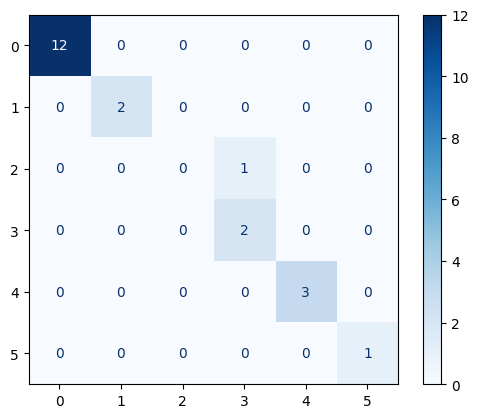

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

zoo_data = pd.read_csv('zoo-data.csv')
zoo_class_type = pd.read_csv('zoo-class-type.csv')

print(zoo_data.head())
print(zoo_class_type.head())

print(zoo_data.isnull().sum())

# Separate features and target variable
X = zoo_data.drop(columns=['animal_name', 'class_type'])
y = zoo_data['class_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Measure the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



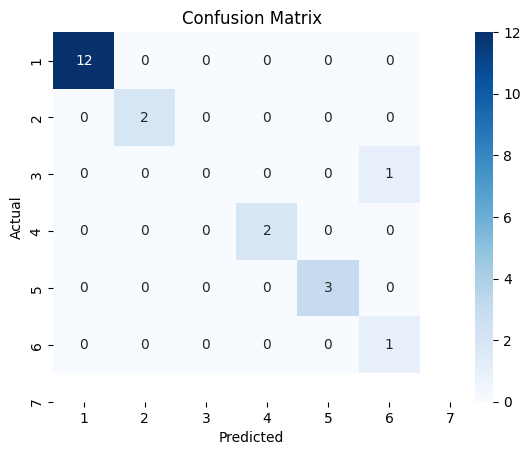

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the datasets
# If the file is not in /mnt/data/, update the path below to the correct path
zoo_data = pd.read_csv('zoo-data.csv')
zoo_class = pd.read_csv('zoo-class-type.csv') # Update if zoo-class-type.csv is in a different directory

# Merge the datasets on class_type if necessary
if 'class_type' in zoo_data.columns and 'class_type' in zoo_class.columns:
    merged_data = zoo_data.merge(zoo_class, on='class_type', how='left')
else:
    merged_data = zoo_data  # Assuming class_type is already labeled

# Separate features and target variable
X = merged_data.drop(columns=['class_type', 'animal_name'], errors='ignore')  # Drop non-numeric columns
y = merged_data['class_type']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the logistic regression model
model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()